In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy as np
import os

In [ ]:
!pip install transformers
!pip install datasets

     |████████████████████████████████| 4.0 MB 4.3 MB/s 
     |████████████████████████████████| 77 kB 6.7 MB/s 
     |████████████████████████████████| 895 kB 44.0 MB/s 
     |████████████████████████████████| 596 kB 25.6 MB/s 
     |████████████████████████████████| 6.5 MB 33.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 325 kB 4.3 MB/s 
     |████████████████████████████████| 212 kB 36.1 MB/s 
     |████████████████████████████████| 136 kB 38.6 MB/s 
     |████████████████████████████████| 1.1 MB 34.8 MB/s 
     |████████████████████████████████| 127 kB 37.8 MB/s 
     |████████████████████████████████| 144 kB 51.2 MB/s 
     |████████████████████████████████| 94 kB 1.0 MB/s 
     |████████████████████████████████| 271 kB 37.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IT350/datasets/qa/qa.csv',names=['question1','question2','label'],header=None)
# df = df.astype({'label':int})
df = df.iloc[1:,:]
df['label']=pd.to_numeric(df['label'])
# del df["docid"]
# print(df["label"].dtype)

# df.head()

In [ ]:
# df=df.iloc[:4000]
df

,question1,question2,label
6700,i have a urine test that tests for nicotine so...,my son has ha several concussion at least 5 fr...,0
12574,what are the symptoms of lupus sun sensitivity?,maybe. but some medications for bacterial vagi...,0
6927,what's the major difference between cfc and hf...,cost. cfc inhalers run about $5 to $25 apiece ...,1
11588,there's a tiny hole above my child's (9 months...,the thyroid is a small butterfly-shaped gland ...,0
3309,my 9 yr old daughter has been extremely fatigu...,you are most likely experiencing nerve compres...,0
...,...,...,...
20054,what to expect? what should we do? . my 4 year...,this is a perfect type of question to ask your...,0
11497,is it legal for doctors currently listed as ac...,most helpful answer in this case there a few t...,1
14260,does adderall cause acne?,i wish i knew that answer my friend. i have ha...,0
14947,sexual health? how can i increase my semen (du...,hi first if you have not got over this problem...,1


In [ ]:
len_of_answers=np.array([])
len_of_questions=np.array([])
df_p = df
for index,row in df.iterrows():
  al = len(row['question2'].split())
  ql = len(row['question1'].split())
  if al > 70 or ql > 70:
    df_p.drop(index, inplace=True)
  len_of_answers=np.append(len_of_answers,al)
  len_of_questions=np.append(len_of_questions,ql)
  
print('questions\nmedian:-',np.median(len_of_questions),'\nmean:-',np.mean(len_of_questions),'\nmin:-',np.min(len_of_questions),'\nmax:-',np.max(len_of_questions))
print('answers\nmedian:-',np.median(len_of_answers),'\nmean:-',np.mean(len_of_answers),'\nmin:-',np.min(len_of_answers),'\nmax:-',np.max(len_of_answers))

questions
median:- 22.0 
mean:- 38.66567686300033 
min:- 3.0 
max:- 139.0
answers
median:- 70.0 
mean:- 100.97685486495281 
min:- 1.0 
max:- 1148.0


In [ ]:
df

,question1,question2,label
6700,i have a urine test that tests for nicotine so...,my son has ha several concussion at least 5 fr...,0
12574,what are the symptoms of lupus sun sensitivity?,maybe. but some medications for bacterial vagi...,0
6927,what's the major difference between cfc and hf...,cost. cfc inhalers run about $5 to $25 apiece ...,1
3309,my 9 yr old daughter has been extremely fatigu...,you are most likely experiencing nerve compres...,0
17300,after taking antibiotic for pneumonia my son i...,go to a different office. see another optometr...,0
...,...,...,...
16358,our daughter is planning on flying coast to co...,if he is still having sperm he did not have a ...,0
3118,im 44yrs old and if its safe to have another p...,hi sorry but i think your body has been throug...,1
24328,i do not have insurance right now so is there ...,no. shingles is a viral infection (herpes zost...,0
6672,i am on medicare supplement insurance (aarp me...,i would suggest tylenol and mucinex drink lots...,0


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)
train.to_csv('/content/drive/MyDrive/IT350/datasets/qa/train.csv',index=False)
test.to_csv('/content/drive/MyDrive/IT350/datasets/qa/test.csv',index=False)

In [ ]:
from datasets import load_dataset

In [ ]:
raw_dataset = load_dataset('csv', data_files={'train': '/content/drive/MyDrive/IT350/datasets/qa/train.csv',
                                              'test': '/content/drive/MyDrive/IT350/datasets/qa/test.csv'})

Using custom data configuration default-dc30a1d604ed67a3


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-dc30a1d604ed67a3/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['question1', 'question2', 'label'],
        num_rows: 19667
    })
    test: Dataset({
        features: ['question1', 'question2', 'label'],
        num_rows: 4917
    })
})

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
def tokenize_function1(examples):
    return tokenizer(examples["question1"],max_length=60, padding="max_length",truncation=True)
tokenized_datasets_question1 = raw_dataset.map(tokenize_function1, batched=True)
def tokenize_function2(examples):
    return tokenizer(examples["question2"],max_length=60, padding="max_length",truncation=True)
tokenized_datasets_answer = raw_dataset.map(tokenize_function2, batched=True)

  0%|          | 0/20 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/20 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

In [ ]:
def extract_features(tokenized_datasets,train_test):
  Y=[]
  X={'input_ids':[],'token_type_ids':[],'attention_mask':[]}
  for i in range(len(tokenized_datasets[train_test])):
    input_ids=tokenized_datasets[train_test][i]['input_ids']
    token_type_ids=tokenized_datasets[train_test][i]['token_type_ids']
    attention_mask=tokenized_datasets[train_test][i]['attention_mask']
    X['input_ids'].append(input_ids)
    X['token_type_ids'].append(token_type_ids)
    X['attention_mask'].append(attention_mask)
    Y.append(tokenized_datasets[train_test][i]['label'])
  X['input_ids']=np.array(X['input_ids'],dtype=np.int32)
  X['token_type_ids']=np.array(X['token_type_ids'],dtype=np.int32)
  X['attention_mask']=np.array(X['attention_mask'],dtype=np.int32)
  Y=np.array(Y,dtype=np.float32)
  return X,Y

In [ ]:
test_data_x1,test_y1=extract_features(tokenized_datasets_question1,'test')
train_data_x1,train_y1=extract_features(tokenized_datasets_question1,'train')
test_data_x2,test_y2=extract_features(tokenized_datasets_answer,'test')
train_data_x2,train_y2=extract_features(tokenized_datasets_answer,'train')

In [ ]:
train_input=[train_data_x1['input_ids'],train_data_x1['attention_mask'],train_data_x1['token_type_ids'],train_data_x2['input_ids'],train_data_x2['attention_mask'],train_data_x2['token_type_ids']]
test_input=[test_data_x1['input_ids'],test_data_x1['attention_mask'],test_data_x1['token_type_ids'],test_data_x2['input_ids'],test_data_x2['attention_mask'],test_data_x2['token_type_ids']]


In [ ]:
import transformers
from transformers import TFBertModel
max_length_q = 60
max_length_a = 60
input_ids1 = tf.keras.layers.Input(
    shape=(max_length_q,), dtype=tf.int32, name="input_ids1"
)

attention_masks1 = tf.keras.layers.Input(
    shape=(max_length_q,), dtype=tf.int32, name="attention_masks1"
)

token_type_ids1 = tf.keras.layers.Input(
    shape=(max_length_q,), dtype=tf.int32, name="token_type_ids1"
)

input_ids2 = tf.keras.layers.Input(
    shape=(max_length_a,), dtype=tf.int32, name="input_ids2"
)

attention_masks2 = tf.keras.layers.Input(
    shape=(max_length_a,), dtype=tf.int32, name="attention_masks2"
)

token_type_ids2 = tf.keras.layers.Input(
    shape=(max_length_a,), dtype=tf.int32, name="token_type_ids2"
)

bert_model1 = transformers.TFBertModel.from_pretrained("bert-base-uncased")

bert_model1.trainable = True

bert_output1 = bert_model1(
    input_ids1, attention_mask=attention_masks1, token_type_ids=token_type_ids1
)
sequence_output1 = bert_output1.last_hidden_state
pooled_output1 = bert_output1.pooler_output

bi_lstm1 = tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(64, return_sequences=True)
)(sequence_output1)

bert_model2 = transformers.TFBertModel.from_pretrained("bert-base-uncased")

bert_model2.trainable = True 

bert_output2 = bert_model2(
    input_ids2, attention_mask=attention_masks2, token_type_ids=token_type_ids2
)
sequence_output2 = bert_output2.last_hidden_state
pooled_output2 = bert_output2.pooler_output

bi_lstm2 = tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(64, return_sequences=True)
)(sequence_output2)

merged = tf.keras.layers.concatenate([bi_lstm1, bi_lstm2],axis=1)
avg_pool = tf.keras.layers.GlobalAveragePooling1D()(merged)
max_pool = tf.keras.layers.GlobalMaxPooling1D()(merged)
concat = tf.keras.layers.concatenate([avg_pool, max_pool])
dropout = tf.keras.layers.Dropout(0.3)(concat)
output = tf.keras.layers.Dense(1, activation="sigmoid")(dropout)

model = tf.keras.models.Model(inputs=[input_ids1, attention_masks1, token_type_ids1,input_ids2, attention_masks2, token_type_ids2], outputs=output)
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=["acc"],
)
model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are in

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids1 (InputLayer)        [(None, 60)]         0           []                               
                                                                                                  
 attention_masks1 (InputLayer)  [(None, 60)]         0           []                               
                                                                                                  
 token_type_ids1 (InputLayer)   [(None, 60)]         0           []                               
                                                                                                  
 input_ids2 (InputLayer)        [(None, 60)]         0           []                               
                                                                                            

In [ ]:
#Fine tuning
bert_model1.trainable=True
bert_model2.trainable=True
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.000002),
    loss="binary_crossentropy",
    metrics=["acc"],
)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids1 (InputLayer)        [(None, 60)]         0           []                               
                                                                                                  
 attention_masks1 (InputLayer)  [(None, 60)]         0           []                               
                                                                                                  
 token_type_ids1 (InputLayer)   [(None, 60)]         0           []                               
                                                                                                  
 input_ids2 (InputLayer)        [(None, 60)]         0           []                               
                                                                                            

In [ ]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/IT350/models/Siamese_BERT_QA_trainable_false_3030/model.h5',custom_objects={'TFBertModel':TFBertModel})

In [ ]:
history=model.fit(train_input,train_y1,validation_data=(test_input,test_y1),epochs=15)

Epoch 1/15
615/615 [==============================] - 499s 749ms/step - loss: 0.6929 - acc: 0.5431 - val_loss: 0.6646 - val_acc: 0.5965
Epoch 2/15
615/615 [==============================] - 448s 729ms/step - loss: 0.6542 - acc: 0.6088 - val_loss: 0.6528 - val_acc: 0.5784
Epoch 3/15
615/615 [==============================] - 449s 730ms/step - loss: 0.6229 - acc: 0.6522 - val_loss: 0.6076 - val_acc: 0.6774
Epoch 4/15
615/615 [==============================] - 447s 728ms/step - loss: 0.6034 - acc: 0.6689 - val_loss: 0.5832 - val_acc: 0.7073
Epoch 5/15
615/615 [==============================] - 446s 726ms/step - loss: 0.5776 - acc: 0.6962 - val_loss: 0.5564 - val_acc: 0.7299
Epoch 6/15
615/615 [==============================] - 448s 728ms/step - loss: 0.5516 - acc: 0.7199 - val_loss: 0.5371 - val_acc: 0.7456
Epoch 7/15
615/615 [==============================] - 447s 727ms/step - loss: 0.5297 - acc: 0.7356 - val_loss: 0.5169 - val_acc: 0.7586
Epoch 8/15
615/615 [============================

In [ ]:
history=model.fit(train_input,train_y1,validation_data=(test_input,test_y1),epochs=5)

Epoch 1/5
615/615 [==============================] - 1092s 2s/step - loss: 0.4627 - acc: 0.7825 - val_loss: 0.4576 - val_acc: 0.7989
Epoch 2/5
615/615 [==============================] - 1037s 2s/step - loss: 0.4319 - acc: 0.8057 - val_loss: 0.4525 - val_acc: 0.8017
Epoch 3/5
615/615 [==============================] - 1038s 2s/step - loss: 0.4091 - acc: 0.8211 - val_loss: 0.4505 - val_acc: 0.8019
Epoch 4/5
112/615 [====>.........................] - ETA: 12:59 - loss: 0.3841 - acc: 0.8404

KeyboardInterrupt: ignored

In [ ]:
history=model.fit(train_input,train_y1,validation_data=(test_input,test_y1),epochs=5,batch_size=32)

Epoch 1/5
276/615 [============>.................] - ETA: 6:45 - loss: 0.7220 - acc: 0.4998

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/MyDrive/IT350/models/Siamese_BERT_QA_trainable_false_30_90/model.h5')

In [ ]:
val_data=[test_data['input_ids'],test_data['token_type_ids'],test_data['attention_mask']]
model.evaluate(val_data,test_y)

154/154 [==============================] - 86s 528ms/step - loss: 0.2082 - acc: 0.9174


[0.20824430882930756, 0.9174293279647827]

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

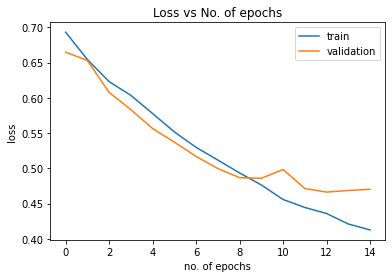

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs No. of epochs')
plt.ylabel('loss')
plt.xlabel('no. of epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()